
## Chocolate Dataset


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, 
import matplotlib.pyplot as plt


Visualization

Visualize the rating column with a histogram!
Comment on the resulting figure!
Convert and Visualize.
Convert the Column Percent.
Change the type of values in the column percent from string values to numerical values.
Visualize

Plot the converted numerical Cocoa Percent values against the Rating values!
From what you see, does more cocoa in a bar correspond to a higher rating?
Hint: Try a scatter plot with small alpha, e.g., 0.1, to flush out the density of each point.
Normalization

Normalize the Rating Column and print the results.
Challenge yourself (Optional)

List the companies ordered by their average score (averaged over each company’s reviews).
Encoding

Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

In [170]:
# Step 2

df = pd.read_csv('flavors_of_cacao.csv')

print("Missing Values:")
print(df.isna().sum())
print(df.shape)

df.dropna(axis=0,inplace=True)

print(df.shape)

Missing Values:
Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64
(1795, 9)
(1793, 9)


In [171]:
# Step 3

print("Dataset Exploration:")
num_tuples = df.shape[0]

unique_company_names = list(set(df['Company (Maker-if known)']))
num_unique_names = len(unique_company_names)

count_2013_reviews = sum(df['Review Date'] == 2013)

missing_rows_bean_type = sum(df['Bean Type'].isna())


print("num tuples: ",num_tuples, "\nnum unique company names: ",num_unique_names,"\ncount of reviews from 2013: ",
       count_2013_reviews, "\nnumber of missing values for bean type: ", missing_rows_bean_type)

Dataset Exploration:
num tuples:  1793 
num unique company names:  416 
count of reviews from 2013:  184 
number of missing values for bean type:  0


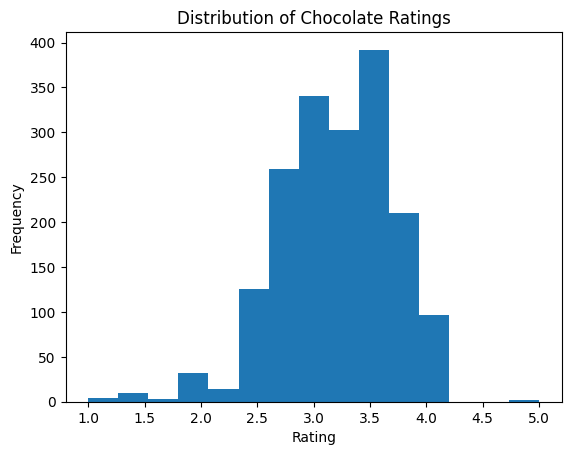

In [172]:
# Step 4

x = df['Rating']

plt.title('Distribution of Chocolate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.hist(x, bins=15)

plt.show()

Above we see the distribution of the ratings values for the choclate data set. As can be seen, the most frequent ratings seem to be in the 3.0 to 3.5 range.

In [173]:
df['Cocoa Percent'] = df['Cocoa Percent'].str.slice(0, -1).astype(float)

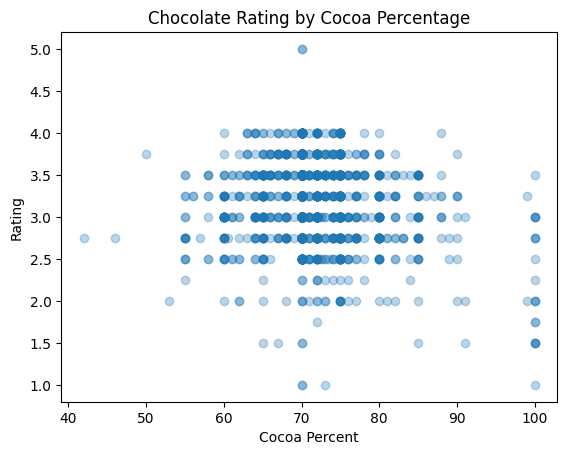

In [174]:
y = df['Rating']
x = df['Cocoa Percent']

plt.title('Chocolate Rating by Cocoa Percentage')
plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')

plt.scatter(x, y, alpha=0.3)

plt.show()

Above we see the cocoa percentages and received ratings for the chocolates from the dataset. It seems as though most favorable ratings occur with chocolates with around 60-80% cocoa but this is also where the majority of the samples in the dataset lie. Chocolates with 100% cocoa appear to be rated less highly than the chocolates containing 20-40% less cocoa.

In [176]:
# Step 6

rating_df = df[['Rating']]

transformer = MinMaxScaler((0,1)).fit(rating_df)

df['Rating'] = transformer.transform(rating_df)

print(df['Rating'])

0       0.6875
1       0.4375
2       0.5000
3       0.6250
4       0.6250
         ...  
1790    0.6875
1791    0.5000
1792    0.6250
1793    0.5625
1794    0.5000
Name: Rating, Length: 1793, dtype: float64


In [ ]:
# Step 7

rating_df = df[['Rating','Company (Maker-if known)']]

company_ratings = rating_df.groupby(['Company (Maker-if known)']).mean().sort_values(by='Rating',ascending=False)

print(company_ratings)          
            

                                        Rating
Company (Maker-if known)                      
Tobago Estate (Pralus)                0.750000
Heirloom Cacao Preservation (Zokoko)  0.718750
Ocelot                                0.718750
Amedei                                0.711538
Matale                                0.703125
...                                        ...
Majani                                0.250000
Love Bar                              0.250000
Callebaut                             0.218750
Machu Picchu Trading Co.              0.218750
Cote d' Or (Kraft)                    0.000000

[416 rows x 1 columns]
